In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (20,10)

# Data analysis

#### The Customer Service team at Profeco (Mexican Consumer Protection Agency) wants to analyze the monitored products in Mexico. 

In [274]:
chunksize = 10 ** 6
filename="data/profeco/all_data.csv"
#filename= "data/sample.csv"

In [275]:
data = pd.read_csv(filename, chunksize=chunksize, iterator=True, header=0, low_memory=False)
df = pd.concat(data, ignore_index=True)


## Exploratory Analysis

In [276]:
# Head of data to review attributes and types.
df.head()

,producto,presentacion,marca,categoria,catalogo,precio,fechaRegistro,cadenaComercial,giro,nombreComercial,direccion,estado,municipio,latitud,longitud
0,CUADERNO FORMA ITALIANA,96 HOJAS PASTA DURA. CUADRICULA CHICA,ESTRELLA,MATERIAL ESCOLAR,UTILES ESCOLARES,25.9,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417
1,CRAYONES,CAJA 12 CERAS. JUMBO. C.B. 201423,CRAYOLA,MATERIAL ESCOLAR,UTILES ESCOLARES,27.5,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417
2,CRAYONES,CAJA 12 CERAS. TAMANO REGULAR C.B. 201034,CRAYOLA,MATERIAL ESCOLAR,UTILES ESCOLARES,13.9,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417
3,COLORES DE MADERA,CAJA 12 PIEZAS LARGO. TRIANGULAR. C.B. 640646,PINCELIN,MATERIAL ESCOLAR,UTILES ESCOLARES,46.9,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417
4,COLOR LARGO,CAJA 36 PIEZAS. CON SACAPUNTAS. 68-4036,CRAYOLA,MATERIAL ESCOLAR,UTILES ESCOLARES,115.0,2011-05-18 00:00:00.000,ABASTECEDORA LUMEN,PAPELERIAS,ABASTECEDORA LUMEN SUCURSAL VILLA COAPA,CANNES No. 6 ESQ. CANAL DE MIRAMONTES,DISTRITO FEDERAL,TLALPAN,19.29699,-99.125417


In [277]:
# Tail of data to review attributes and types.
df.tail()

,producto,presentacion,marca,categoria,catalogo,precio,fechaRegistro,cadenaComercial,giro,nombreComercial,direccion,estado,municipio,latitud,longitud
62530710,PLANCHAS,FV 3756 O FV 3756 X0. VAPOR. SUELA ANTIADHERENTE,T-FAL. PRIMA 56,APARATOS ELECTRICOS,ELECTRODOMESTICOS,559.0,2015-12-09 14:22:53.000,COPPEL,TIENDA DE AUTOSERVICIO,COPPEL SUCURSAL NUEVO LAREDO,"GONZALEZ 2815, ESQ. GUERRERO, COL. CENTRO, CP....",TAMAULIPAS,NUEVO LAREDO,27.49295,-99.507201
62530711,REFRIGERADORES,RME 1436 Y (GRAFITO). 369.82 DM3 2 PUERTAS HOR...,MABE,APARATOS ELECTRICOS,ELECTRODOMESTICOS,9199.0,2015-12-09 14:19:41.000,COPPEL,TIENDA DE AUTOSERVICIO,COPPEL SUCURSAL NUEVO LAREDO,"GONZALEZ 2815, ESQ. GUERRERO, COL. CENTRO, CP....",TAMAULIPAS,NUEVO LAREDO,27.49295,-99.507201
62530712,REFRIGERADORES,RMA 1025 VMX (GRAFITO). 251.20 DM3. 2 PUERTAS ...,MABE,APARATOS ELECTRICOS,ELECTRODOMESTICOS,5699.0,2015-12-09 14:21:55.000,COPPEL,TIENDA DE AUTOSERVICIO,COPPEL SUCURSAL NUEVO LAREDO,"GONZALEZ 2815, ESQ. GUERRERO, COL. CENTRO, CP....",TAMAULIPAS,NUEVO LAREDO,27.49295,-99.507201
62530713,CAFETERAS,BCM1410B. CAPACIDAD 12 TAZAS,BLACK & DECKER,APARATOS ELECTRICOS,ELECTRODOMESTICOS,449.0,2015-12-09 14:38:46.000,COPPEL,TIENDA DE AUTOSERVICIO,COPPEL SUCURSAL NUEVO LAREDO,"GONZALEZ 2815, ESQ. GUERRERO, COL. CENTRO, CP....",TAMAULIPAS,NUEVO LAREDO,27.49295,-99.507201
62530714,COMPONENTES DE AUDIO,"CM 4230. CD´S 1 (MP3, USB) POTENCIA 1400 W (PMPO)",LG,APARATOS ELECTRONICOS,ELECTRODOMESTICOS,1999.0,2015-12-09 14:06:47.000,COPPEL,TIENDA DE AUTOSERVICIO,COPPEL SUCURSAL NUEVO LAREDO,"GONZALEZ 2815, ESQ. GUERRERO, COL. CENTRO, CP....",TAMAULIPAS,NUEVO LAREDO,27.49295,-99.507201


In [278]:
# Count of not null rows by attribute
df.count()

producto           62530715
presentacion       62530715
marca              62530715
categoria          61643377
catalogo           62530487
precio             62530715
fechaRegistro      62530715
cadenaComercial    62529531
giro               62530428
nombreComercial    62530715
direccion          62530715
estado             62515661
municipio          62515661
latitud            61377992
longitud           61377992
dtype: int64

In [279]:
#Basic information about data. In small datasets it shows count, mean, std, min, etc of numeric data.
df.describe()

,producto,presentacion,marca,categoria,catalogo,precio,fechaRegistro,cadenaComercial,giro,nombreComercial,direccion,estado,municipio,latitud,longitud
count,62530715,62530715,62530715,61643377,62530487,62530715.0,62530715,62529531,62530428,62530715,62530715,62515661,62515661,6.137799e+07,6.137799e+07
unique,1107,8244,2079,41,12,165014.0,7487339,705,21,3895,6526,33,206,5.582000e+03,5.581000e+03
top,REFRESCO,1 KG. GRANEL,S/M,MEDICAMENTOS,BASICOS,29.9,2014-12-01 00:00:00.000,WAL-MART,TIENDA DE AUTOSERVICIO,WAL MART,BOULEVARD JOSE TORRES LANDA NO. 4137 ENTRE BLV...,DISTRITO FEDERAL,LEON,1.932089e+01,-9.915235e+01
freq,1247981,868870,19814738,11485813,33321024,414665.0,116484,8643133,53084163,810219,197304,11284102,1908469,3.004220e+05,2.912180e+05


## Questions

#### 1.How many commercial chains are monitored, and therefore, included in this database?

In [280]:
df['cadenaComercial'].nunique()

705

In total we have 705 different commercial chains that are monitored by the system.

#### 2.What are the top 10 monitored products by State?

Due to the fact that this question is a bit ambiguous this question will be answered in 3 different ways.

#### 2.1 Top 10 of product count by state

In [281]:
df_group= df.groupby(by=["estado","producto"]).agg({"producto":"count"}).rename(columns={"producto":"count_producto"})
df_group


count_producto
estado         producto                       
AGUASCALIENTES A.S.COR                     175
               ABILIFY                      94
               ACARBOSA                    145
               ACEITE                     5838
               ACEITE DE OLIVA            2207
...                                        ...
ZACATECAS      ZWAN                       2441
               ZWAN. PREMIUM              2997
               ZYLOPRIM                    371
               ZYPREXA                     532
estado         producto                     20

[30361 rows x 1 columns]

In [282]:
df_count=df_group.assign(rn_count= df_group.sort_values(by=["count_producto"],ascending=[False]).groupby(by=["estado"]).cumcount() + 1)
df_count

count_producto  rn_count
estado         producto                                 
AGUASCALIENTES A.S.COR                     175       523
               ABILIFY                      94       718
               ACARBOSA                    145       619
               ACEITE                     5838        16
               ACEITE DE OLIVA            2207        81
...                                        ...       ...
ZACATECAS      ZWAN                       2441       132
               ZWAN. PREMIUM              2997       111
               ZYLOPRIM                    371       647
               ZYPREXA                     532       548
estado         producto                     20         1

[30361 rows x 2 columns]

#### This is the list of top 10 productos count by state

In [299]:
df_top_count= df_count.sort_values(['estado','rn_count'], ascending=[True,True]).where(df_count["rn_count"]<=10).dropna()
df_top_count.head(10) #Example in one state, remove head for complete data.

count_producto  rn_count
estado         producto                                         
AGUASCALIENTES FUD                             12005.0       1.0
               DETERGENTE P/ROPA               10188.0       2.0
               LECHE ULTRAPASTEURIZADA          9824.0       3.0
               SHAMPOO                          9654.0       4.0
               REFRESCO                         9481.0       5.0
               DESODORANTE                      8859.0       6.0
               JABON DE TOCADOR                 8517.0       7.0
               CHILES EN LATA                   7946.0       8.0
               YOGHURT                          7401.0       9.0
               MAYONESA                         7173.0      10.0

In [284]:
#Testing the rows count -
df.where((df["estado"]=="DISTRITO FEDERAL") & (df["producto"]=="PAN DE CAJA")).dropna()

,producto,presentacion,marca,categoria,catalogo,precio,fechaRegistro,cadenaComercial,giro,nombreComercial,direccion,estado,municipio,latitud,longitud
779,PAN DE CAJA,PAQUETE MEDIANO 480 GR. INTEGRAL. REBANADO,BIMBO,PAN,BASICOS,22.0,2011-01-10 00:00:00.000,COMERCIAL MEXICANA,TIENDA DE AUTOSERVICIO,COMERCIAL MEXICANA SUCURSAL INSURGENTES,PERPETUA NO. 35 ESQ. INSURGENTES SUR,DISTRITO FEDERAL,BENITO JUAREZ,19.366903,-99.181344
780,PAN DE CAJA,PAQUETE GRANDE 680 GR. INTEGRAL. REBANADO,WONDER. 100%,PAN,BASICOS,27.0,2011-01-10 00:00:00.000,COMERCIAL MEXICANA,TIENDA DE AUTOSERVICIO,COMERCIAL MEXICANA SUCURSAL INSURGENTES,PERPETUA NO. 35 ESQ. INSURGENTES SUR,DISTRITO FEDERAL,BENITO JUAREZ,19.366903,-99.181344
781,PAN DE CAJA,PAQUETE MEDIANO 460 GR. REBANADO BLANCO,BIMBO,PAN,BASICOS,20.0,2011-01-10 00:00:00.000,COMERCIAL MEXICANA,TIENDA DE AUTOSERVICIO,COMERCIAL MEXICANA SUCURSAL INSURGENTES,PERPETUA NO. 35 ESQ. INSURGENTES SUR,DISTRITO FEDERAL,BENITO JUAREZ,19.366903,-99.181344
955,PAN DE CAJA,PAQUETE MEDIANO 475 GR. INTEGRAL. REBANADO,WONDER. 100%,PAN,BASICOS,22.5,2011-01-10 00:00:00.000,COMERCIAL MEXICANA,TIENDA DE AUTOSERVICIO,COMERCIAL MEXICANA SUCURSAL INSURGENTES,PERPETUA NO. 35 ESQ. INSURGENTES SUR,DISTRITO FEDERAL,BENITO JUAREZ,19.366903,-99.181344
956,PAN DE CAJA,PAQUETE GRANDE 680 GR. REBANADO BLANCO. CON FIBRA,WONDER,PAN,BASICOS,24.0,2011-01-10 00:00:00.000,COMERCIAL MEXICANA,TIENDA DE AUTOSERVICIO,COMERCIAL MEXICANA SUCURSAL INSURGENTES,PERPETUA NO. 35 ESQ. INSURGENTES SUR,DISTRITO FEDERAL,BENITO JUAREZ,19.366903,-99.181344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62500073,PAN DE CAJA,PAQUETE 210 GR. TOSTADO. CLÁSICO,BIMBO,PAN,BASICOS,18.05,2015-12-09 12:19:42.073,COMERCIAL MEXICANA,TIENDA DE AUTOSERVICIO,COMERCIAL MEXICANA SUCURSAL COAPA,"PROL. DIVISION DEL NORTE 4555, ENTRE ESCUELA Y...",DISTRITO FEDERAL,TLALPAN,19.290289,-99.130672
62500074,PAN DE CAJA,PAQUETE GRANDE 680 GR. INTEGRAL. REBANADO,BIMBO,PAN,BASICOS,29.58,2015-12-09 12:19:52.430,COMERCIAL MEXICANA,TIENDA DE AUTOSERVICIO,COMERCIAL MEXICANA SUCURSAL COAPA,"PROL. DIVISION DEL NORTE 4555, ENTRE ESCUELA Y...",DISTRITO FEDERAL,TLALPAN,19.290289,-99.130672
62500278,PAN DE CAJA,PAQUETE 210 GR. TOSTADO. CLÁSICO,BIMBO,PAN,BASICOS,19.9,2015-12-09 14:43:14.340,SORIANA PLUS,TIENDA DE AUTOSERVICIO,SORIANA PLUS SUCURSAL MIRAMONTES,"CANAL DE MIRAMONTES 2600, COL. EX HDA. SAN ANT...",DISTRITO FEDERAL,COYOACÁN,19.320886,-99.132463
62500279,PAN DE CAJA,PAQUETE MEDIANO 460 GR. REBANADO BLANCO,BIMBO,PAN,BASICOS,23.5,2015-12-09 14:43:05.503,SORIANA PLUS,TIENDA DE AUTOSERVICIO,SORIANA PLUS SUCURSAL MIRAMONTES,"CANAL DE MIRAMONTES 2600, COL. EX HDA. SAN ANT...",DISTRITO FEDERAL,COYOACÁN,19.320886,-99.132463


#### 2.2 Top 10 of products present in more states

In [285]:
df_group_state= df.groupby(by=["producto"]).agg({"estado":"nunique"}).rename(columns={"estado":"count_estado"})
df_group_state

,count_estado
producto,
A.S.COR,32
ABILIFY,22
ACARBOSA,32
ACEITE,32
ACEITE DE OLIVA,32
...,...
ZWAN PREMIUM,2
ZWAN. PREMIUM,32
ZYLOPRIM,21


In [286]:
df_rank_estado = df_group_state.sort_values(['count_estado'], ascending=[False]).assign(rn_count_estado= df_group_state.reset_index().index+1)
df_rank_estado

,count_estado,rn_count_estado
producto,,
A.S.COR,32,1
MAIZ POZOLERO,32,2
MANDARINA,32,3
MANGO,32,4
MANTECA DE CERDO,32,5
...,...,...
SURIMI,1,1103
TENHUAYACA,1,1104
TIBURON,1,1105


In [287]:
df_top_count_estado= df_rank_estado.sort_values(['producto','rn_count_estado'], ascending=[True,True]).where(df_rank_estado["rn_count_estado"]<=10).dropna()
df_top_count_estado

,count_estado,rn_count_estado
producto,,
A.S.COR,32.0,1.0
MAIZ POZOLERO,32.0,2.0
MANDARINA,32.0,3.0
MANGO,32.0,4.0
MANTECA DE CERDO,32.0,5.0
MANTEQUILLA,32.0,6.0
MANZANA,32.0,7.0
MARCADORES,32.0,8.0
MARGARINA,32.0,9.0


In [288]:
#Testing the rows count
df.where(df["producto"]=="ACEITE")["estado"].dropna().unique()

array(['MÉXICO', 'DISTRITO FEDERAL', 'GUANAJUATO', 'JALISCO', 'QUERÉTARO',
       'TABASCO', 'TLAXCALA', 'YUCATÁN',
       'VERACRUZ DE IGNACIO DE LA LLAVE', 'MICHOACÁN DE OCAMPO', 'OAXACA',
       'QUINTANA ROO', 'ZACATECAS', 'NUEVO LEÓN', 'SINALOA', 'PUEBLA',
       'HIDALGO', 'SONORA', 'COAHUILA DE ZARAGOZA', 'COLIMA',
       'AGUASCALIENTES', 'DURANGO', 'BAJA CALIFORNIA',
       'BAJA CALIFORNIA SUR', 'CAMPECHE', 'CHIAPAS', 'CHIHUAHUA',
       'GUERRERO', 'MORELOS', 'NAYARIT', 'SAN LUIS POTOSÍ', 'TAMAULIPAS'],
      dtype=object)

#### 2.3 Top 10 products by avg price by state

In [289]:
df["precio"]= pd.to_numeric(df['precio'], errors='coerce')

In [290]:
df_avg_precio= df.groupby(by=["estado","producto"],dropna=True)["precio"].mean().reset_index(drop=False).dropna()
df_avg_precio


,estado,producto,precio
0,AGUASCALIENTES,A.S.COR,193.256343
1,AGUASCALIENTES,ABILIFY,748.329362
2,AGUASCALIENTES,ACARBOSA,50.002207
3,AGUASCALIENTES,ACEITE,28.137432
4,AGUASCALIENTES,ACEITE DE OLIVA,85.778491
...,...,...,...
30355,ZACATECAS,ZUCARITAS,37.084171
30356,ZACATECAS,ZWAN,68.390602
30357,ZACATECAS,ZWAN. PREMIUM,94.773844
30358,ZACATECAS,ZYLOPRIM,347.974798


In [291]:
df_rank= df_avg_precio.assign(rn=df_avg_precio.sort_values(['precio'], ascending=[False]).groupby(by=["estado"]).cumcount() + 1)
df_top= df_rank.sort_values(['estado','rn'], ascending=[True,True]).where(df_rank["rn"]<=10).dropna()
df_top

,estado,producto,precio,rn
662,AGUASCALIENTES,PANTALLAS,11725.225647,1.0
854,AGUASCALIENTES,TELEVISORES,10448.297238,2.0
764,AGUASCALIENTES,REFRIGERADORES,8038.281374,3.0
348,AGUASCALIENTES,ELECTRONICOS DE VIDEO,7297.301075,4.0
515,AGUASCALIENTES,LAVADORAS,7266.164073,5.0
...,...,...,...,...
29711,ZACATECAS,ELECTRONICOS DE VIDEO,5303.616197,6.0
29992,ZACATECAS,MONTABLES ELECTRICOS,4775.965263,7.0
30327,ZACATECAS,VIDEOCAMARAS,4755.055484,8.0
29610,ZACATECAS,COMPONENTES DE AUDIO,4742.484121,9.0


In [292]:
#Test some states
df_estado= df_top.where((df_top["estado"]=='DISTRITO FEDERAL')|(df_top["estado"]=='MÉXICO')).dropna()
df_estado

,estado,producto,precio,rn
7528,DISTRITO FEDERAL,PANTALLAS,11951.316030,1.0
7742,DISTRITO FEDERAL,TELEVISORES,9302.830981,2.0
7643,DISTRITO FEDERAL,REFRIGERADORES,8494.085169,3.0
7360,DISTRITO FEDERAL,LAVADORAS,6678.344585,4.0
7168,DISTRITO FEDERAL,ELECTRONICOS DE VIDEO,5157.596745,5.0
7184,DISTRITO FEDERAL,ESTUFAS,5097.405471,6.0
7066,DISTRITO FEDERAL,COMPONENTES DE AUDIO,4732.622671,7.0
7806,DISTRITO FEDERAL,VIDEOCAMARAS,4500.433076,8.0
7456,DISTRITO FEDERAL,MONTABLES ELECTRICOS,4379.517657,9.0
7323,DISTRITO FEDERAL,JUGUETES MONTABLES ELECTRICOS,4270.917271,10.0


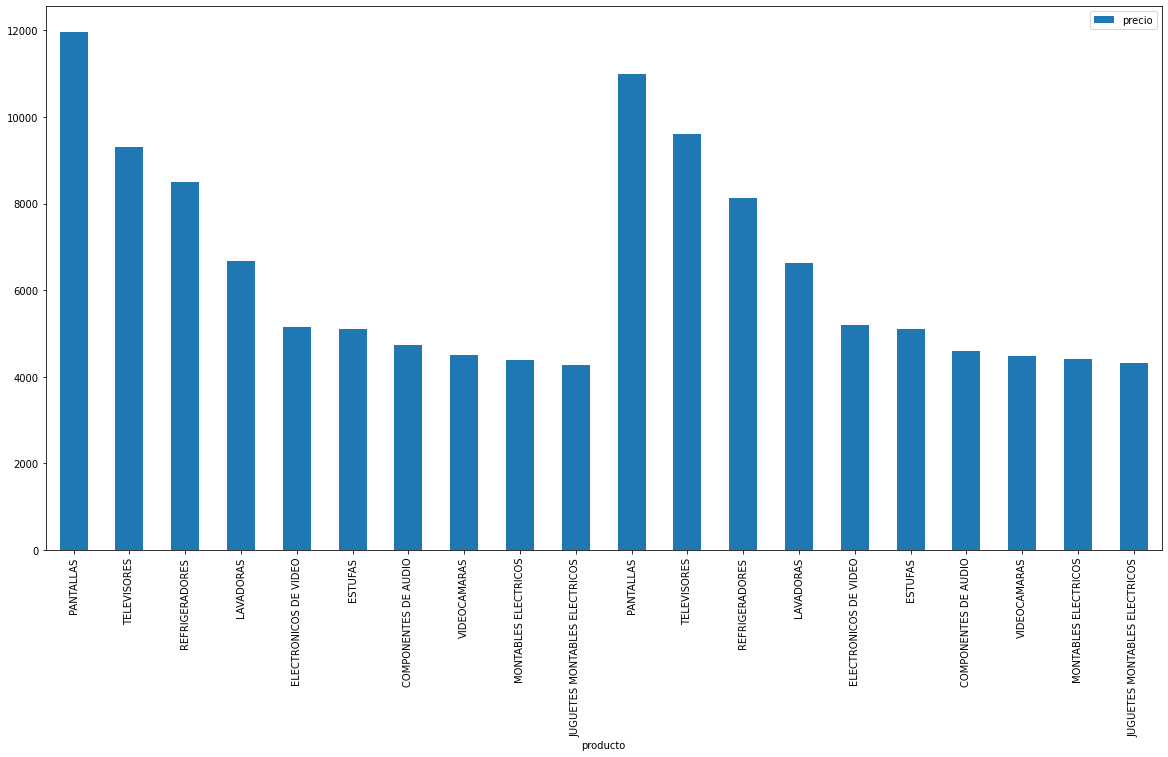

In [293]:
ax = df_estado.plot.bar(x='producto', y='precio',rot=90)

In [294]:
df2 = df_estado.set_index(['estado','producto'])
df2

precio    rn
estado           producto                                         
DISTRITO FEDERAL PANTALLAS                      11951.316030   1.0
                 TELEVISORES                     9302.830981   2.0
                 REFRIGERADORES                  8494.085169   3.0
                 LAVADORAS                       6678.344585   4.0
                 ELECTRONICOS DE VIDEO           5157.596745   5.0
                 ESTUFAS                         5097.405471   6.0
                 COMPONENTES DE AUDIO            4732.622671   7.0
                 VIDEOCAMARAS                    4500.433076   8.0
                 MONTABLES ELECTRICOS            4379.517657   9.0
                 JUGUETES MONTABLES ELECTRICOS   4270.917271  10.0
MÉXICO           PANTALLAS                      10978.058500   1.0
                 TELEVISORES                     9594.685390   2.0
                 REFRIGERADORES                  8129.837185   3.0
                 LAVADORAS                       6629.825086   4.0
                 ELECTRONICOS DE VIDEO           5184.526531   5.0
                 ESTUFAS                         5101.454484   6.0
                 COMPONENTES DE AUDIO            4606.051977   7.0
                 VIDEOCAMARAS                    4469.242608   8.0
                 MONTABLES ELECTRICOS            4410.621654   9.0
                 JUGUETES MONTABLES ELECTRICOS   4325.905110  10.0

In [295]:
df2.index.levels

FrozenList([['DISTRITO FEDERAL', 'MÉXICO'], ['COMPONENTES DE AUDIO', 'ELECTRONICOS DE VIDEO', 'ESTUFAS', 'JUGUETES MONTABLES ELECTRICOS', 'LAVADORAS', 'MONTABLES ELECTRICOS', 'PANTALLAS', 'REFRIGERADORES', 'TELEVISORES', 'VIDEOCAMARAS']])

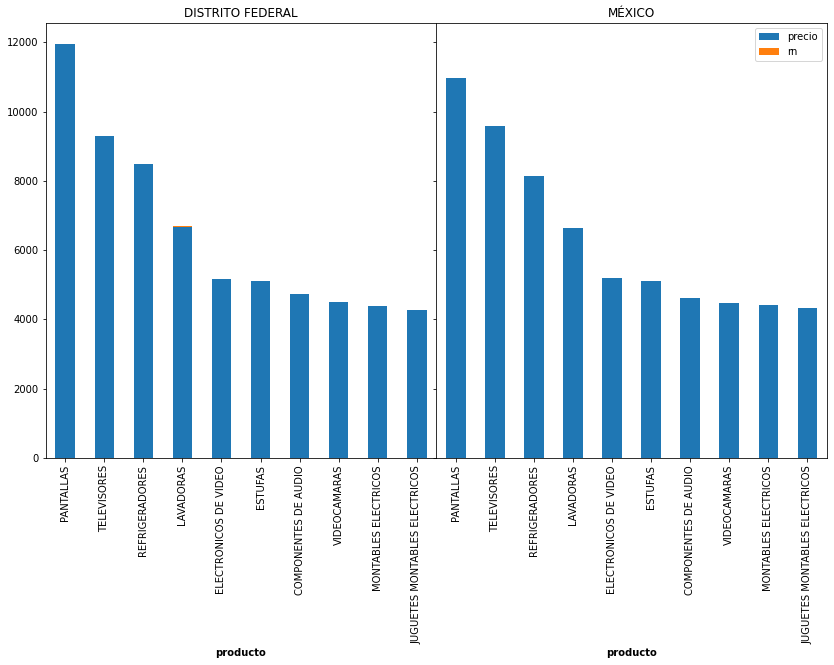

In [301]:
#Another way to plot data

def plot_function(x, ax):
    ax= graph[x]
    ax.set_xlabel(x, weight='bold')
    ax.set_title(x)
    return df2.xs(x).plot(kind='bar', stacked='True', ax=ax, legend=False)

n_subplots = len(df2.index.levels[0])
fig, axes = plt.subplots(nrows=1, ncols=n_subplots, sharey=True, figsize=(14, 8))  # width, height

graph = dict(zip(df2.index.levels[0], axes))
plots = list(map(lambda x: plot_function(x, graph[x]), graph))
ax.tick_params(axis='both', which='both', length=0)
fig.subplots_adjust(wspace=0)

plt.legend()
plt.show()

3.Which is the commercial chain with the highest number of monitored products?

In [297]:
df_highest_commercial_chain= df.groupby("cadenaComercial",as_index=False).agg({"producto":"nunique"}).rename(columns={'producto':'cuenta_productos'})
df_highest_commercial_chain.sort_values(['cuenta_productos'], ascending=[False]).head(1)

,cadenaComercial,cuenta_productos
574,SORIANA,1059


The commercial chain with the highest number of monitored produts (unique) is SORIANA

In [302]:
df_highest_commercial_chain= df.groupby("cadenaComercial",as_index=False).agg({"producto":"count"}).rename(columns={'producto':'cuenta_productos'})
df_highest_commercial_chain.sort_values(['cuenta_productos'], ascending=[False]).head(1)

,cadenaComercial,cuenta_productos
683,WAL-MART,8643133


The commercial chain with the highest number of monitored produts (no unique) is WAL-MART.

#### 4. Use the data to find an interesting fact: - How many products types of products are sold nationwide (32 states) - In large dataset

In [298]:
df_rank_estado.where(df_rank_estado["count_estado"]==32).count()

count_estado       713
rn_count_estado    713
dtype: int64

A total of 713 products are sold throughout the country.

#### 5. What are the lessons learned from this exercise?

There are undoubtedly many lessons learned.
For my part it is always good to practice with the Pandas library, it is very good and widely used in the data world and especially in data science. Maybe not quite to my taste because I don't consider it superior to SQL but it is an excellent tool.
With this process I was able to face the challenge of handling a high volume of data in a local computer, data management in memory, data cleansing, information adjustment.
I also realized how important it is to define the questions to be solved and to avoid ambiguity. 
Another lesson is the importance of knowing the content and type of data. 
In short, excellent exercise. 

#### 6. Can you identify other ways to approach this problem? Explain.

Being a problem that can escalate greatly with the amount of data and with possible new business needs such as opening the market to other countries. 
The problem can be addressed using other tools such as dash, which is a distributed system designed to compensate for this shortcoming in Pandas. 
It could also be a very important tool as an alternative Spark that works on memory in distributed systems, much better than pandas to handle large volumes of data and has something that for me is a super winning point. SparkSQL allows you to use this language on the data making the query process much more enjoyable. 

Another interesting point that I would like to contribute is that although for ease of use I use Jupyter Notebook, this process should be done in a system that allows to be automated and divided into processes and easily ported to other environments and pipelines.